<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Aula%2004%20-%20Estudo%20Dirigido%3A%20Discretiza%C3%A7%C3%A3o%20de%20sinais%20(Willian%20de%20Vargas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo Dirigido: Discretização de sinais

Bibliotecas necessárias

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck

plt.style.use('ggplot')

## Seja o sinal contínuo $x(t) = cos(4\pi t)$

### A) Escreva a expressão do sinal discreto resultante da amostragem do sinal $x(t)$ com uma frequência de amostragem $fs_k=kf_0$ e calcule sua frequência angular e período

**OBTENDO FREQÊNCIA ANGULAR, FREQUÊNCIA DO SINAL E PERÍODO:**

**Frequência Angular($\omega_0$):**
* Propriedade: $cos(4\pi*t) = cos(\omega_0*t+\theta_0)$
  * $\omega_0 = 4\pi \text{ rad/s}$

**Frequência do sinal ($f_0$):**
* $\omega_0 = 2\pi*f_0$
* $\frac{\omega_0}{2\pi} = f_0$
* $\frac{4\pi}{2\pi} = f_0$
* $2Hz = f_0$

**Período de fundamental ($T_0$):**
* $T_0 = \frac{2\pi}{\omega_0}$
* $T_0 = \frac{2\pi}{4\pi}$
* $T_0 = \frac{2}{4}$
* $T_0 = 0.5 s$

**DISCRETIZANDO O SINAL CONTÍNUO: $x(t) = cos(4\pi*t)$**


Reescrevendo a função utilizando a propriedade: $cos(\pi*t) = cos(\omega_0*t+\theta_0)$

$x(t) = cos(4\pi*t) = cos( \omega_0*t)$

**Substitua:**

$\omega_0 = 2\pi*f_0$

* $x(t) = cos(2\pi*f_0*t)$ → Sinal contínuo pronto para ser discretizado.

$t = nT_s$

* $x[n] = cos[2\pi*f_0*nT_s]$ → Sinal discretizado. Agora, falta manipular esta função conforme abaixo.

**Manipulando:**

$T_s = \frac{1}{f_s}$

$x[n] = cos[2\pi*f_0*n*\frac{1}{f_s}] = cos[2\pi*\frac{f_0}{f_s}*n]$

(Considerando $fs_k = k*f_0$): $k = \frac{f_s}{f_0}$ → $\frac{f_0}{f_s}=\frac{1}{k}$

$x[n] = cos[2\pi*\frac{1}{k}*n] = cos[\frac{2\pi}{k}*n]$ 

**→ EXPRESSÃO DO SINAL DISCRETIZADO: $x[n] = cos[\frac{2\pi}{k}*n]$**

### B) Particularize a expressão obtida acima para k = 4 e k = 8. Para cada um destes valores de k calcule a frequência angular e o período. Plote os sinais (no mínimo 1 segundo de sinal deverá ser exibido no gráfico).

* **OBS.:** a plotagem dos sinais deve ser feita com o <ins>eixo x em segundos</ins>

**k = 4**

* Período:
  * $N = k$ → $N=4$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{4*2} = \frac{1}{8} = 0.125 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{4} =\frac{\pi}{2} \text{ rad/s}$

**k = 8**

* Período:
  * $N = k$ → $N=8$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{8*2} = \frac{1}{16} = 0.0625 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{8} =\frac{\pi}{4} \text{ rad/s}$

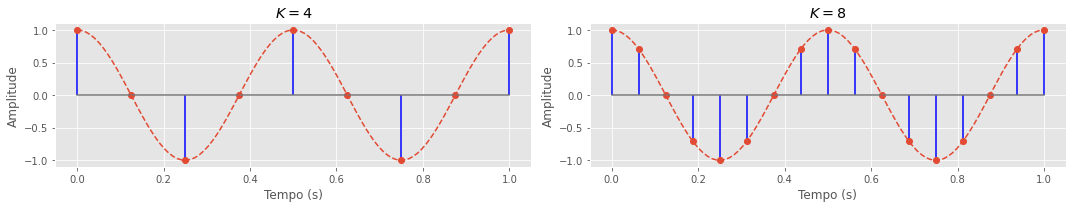

In [2]:
N = 1
f0 = 2 # Frequência do sinal

t = np.linspace(0, N, 100)
x_c = np.cos(4*np.pi*t)

plt.figure(figsize=(15,3))

# K = 4

k = 4
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)  # Equação calculada no exercício de discretização

plt.subplot(1,2,1)
plt.title("$K=4$")
plt.stem(n/(f0*k), x_d, 'b', use_line_collection=True)
plt.plot(t, x_c, '--')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

# K = 8

k = 8
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)  # Equação calculada no exercício de discretização

plt.subplot(1,2,2)
plt.title("$K=8$")
plt.stem(n/(f0*k), x_d, 'b', use_line_collection=True)
plt.plot(t, x_c, '--')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

### C) Considerando o teorema de Nyquist, qual dever ser a taxa de amostragem para este sinal? Amostre o sinal $x(t)$ utilizando a taxa de amostragem de Nyquist e plote. Comente o resultado.

O teorema de Nyquist diz que a taxa de amostragem ($f_s$) deve ser maior que o dobro da maior frequência presente no sinal medido. Neste caso, temos apenas uma frequência ($2Hz$) e com isso, a taxa de amostragem deve ser no mínimo igual a 4 amostras por ciclo. Quanto maior este número, melhor será a reconstruçã do sinal. No entanto, maior será o poder computacional exigido.

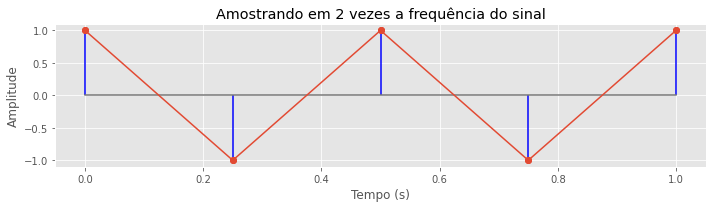

In [3]:
#Frequencia do sinal a ser amostrado:
f0 = 2

#Plotando os resultados:

plt.figure(figsize=(10,3))

# ===== Amostrando em 2 vezes a frequência do sinal

ts = 1/(2*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(111)
plt.title("Amostrando em 2 vezes a frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')

plt.tight_layout()
plt.show()

**Discução:** Com esta demonstração, é possível observar que com o valor mínimo de amostragem, segundo o teorema de Nyquist, já é possível observar um comportamento mais característico do sinal original que foi amostrado, diferentemente da distorção total que ocorre durante a reconstrução do sinal quando a taxa de amostragem é menor que este valor mínimo. Apesar disso, o sinal ainda não é totalmente fiel ao original. 

### D) Plote o sinal $x(t)$, considerando a frequência de amostragem dez vezes maior que a frequência fundamental do sinal. O que você observa?

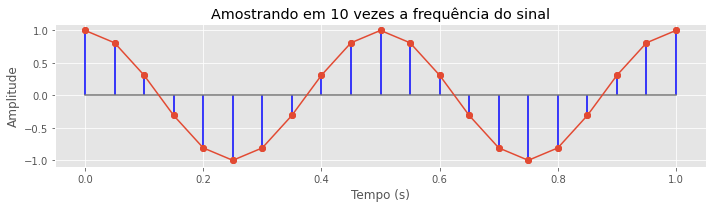

In [4]:
#Frequencia do sinal a ser amostrado:
f0 = 2

#Plotando os resultados:

plt.figure(figsize=(10,3))

# ===== Amostrando em 10 vezes a frequência do sinal

ts = 1/(10*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(111)
plt.title("Amostrando em 10 vezes a frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')

plt.tight_layout()
plt.show()

**Discução:** Nesta demonstração é possível observar que a reconstrução do sinal começa a se assemelhar mais ainda ao sinal original. Quanto mais alta a frequência de amostragem, mais fiel será o sinal reconstruído em relação ao sinal original. No entanto, maior será o poder computacional exigido.

### E) Por fim, plote o sinal $x(t)$ com um frequência de amostragem igual a 4/3 da frequência fundamental. O que você observa?

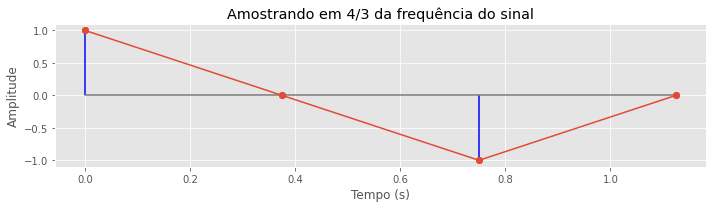

In [5]:
#Frequencia do sinal a ser amostrado:
f0 = 2

#Plotando os resultados:

plt.figure(figsize=(10,3))

# ===== Amostrando em 4/3 da frequência do sinal

ts = 1/((4/3)*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(111)
plt.title("Amostrando em 4/3 da frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')

plt.tight_layout()
plt.show()

**Discução:** Nesta demonstração podemos constatar a distorção total do sinal reconstruído quando comparado ao original. Com isso, podemos comprovar o teorema de Nyquist que diz que a taxa minima de amostragem deve ser o dobro da frequência do sinal para que seu comportamento comece a ser coerente ao sinal de origem.